In [97]:
# Compilation of imports used in this notebook

import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# And, while we're at it, a little Jupyter magic:
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
colnames = ['author', 'title', 'date' , 'length', 'text']
data = pd.read_csv('./talks-v1b.csv', names=colnames)
lengths = data.length.tolist()

In [3]:
# Some checking of results
print(type(lengths), len(lengths), (lengths[185]/60))

<class 'list'> 2113 11.9666666667


## Lengths

In [18]:
import statistics

sorted_lengths = sorted(lengths)
len_mean = statistics.mean(sorted_lengths)
len_median = statistics.median(sorted_lengths)
len_mode = statistics.mode(sorted_lengths)
print("Mean: %2.2f. Median: %2.2f. Mode: %2.2f." % (len_mean, len_median, len_mode))

Mean: 785.00. Median: 838.00. Mode: 11.00.


In [20]:
m, s = divmod(len_mean, 60)
print("The average TED talk is %02d:%02d." % (m, s))

The average TED talk is 13:05.


In [ ]:
# Import data from file into dataframe
df = pd.read_csv("./talks-v1b.csv", ",")

# Sort by the longest text
by_longest = df.sort_values(['length'], ascending=[True])

# Draw the graph
mpl.style.use('ggplot')
ax = by_longest[['length','lexicon']].plot(kind='bar', 
                                           title ="Lengths",
                                           figsize=(15,10),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("Text",fontsize=12)
ax.set_ylabel("Word Count",fontsize=12)
ax.set_xticklabels(list(by_longest['text'])) 
mpl.pyplot.show()

## Titles

In [22]:
titles = data.title.tolist()

In [76]:
import re
from stop_words import get_stop_words
from collections import defaultdict

# remove common words and tokenize
stoplist = set(get_stop_words('en'))
texts = [[word for word in title.lower().split() if word not in stoplist]
         for title in titles]
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
titlewords = [[token for token in text if frequency[token] > 1]
         for text in texts]

**`titlewords`** is a list of lists with each list being the words remaining in a title after removing stop words and words that occur only once. For example:

    Averting the climate crisis > climate, crisis  
    Simplicity sells > simplicity  
    My wish: A call for open-source architecture > wish, call, open-source, architecture  
    The genesis of Google > google  
    Art made of storms > art, made  
    
A dictionary that paired a talk with its list contents would probably be useful. *Sigh.*

In [ ]:
titlewords_all = sum(titlewords, [])
title_just_words = [re.sub(r'[^A-Za-z]+', '', x) for x in titlewords_all]

# Let's count some words:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux
    
dictionary = wordListToFreqDict(title_just_words)
sorteddict = sortFreqDict(dictionary)

# Getting rid of null artifact
sorteddict.pop(0)

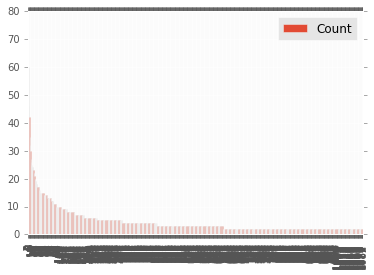

In [96]:
df = pd.DataFrame(sorteddict)
df.columns = ['Count', 'Word']
df.plot.bar()